Yuzuru Sato and Isaia Nisoli 

Julia for stochastic nonlinear phenomena

HSI summer school on computational methods in dynamical systems

21 August, 2025

In [5]:
#using Pkg
#Pkg.activate("./")
#Pkg.add("Plots")
using Plots

# Intermittency in Pelikan maps

Pelikan map is given as 

$$x_{t+1}=\xi_t x_t ~({\rm mod} ~1), ~~~(t=1,2,\ldots)$$

where $~{\rm Prob}[\xi_t=a]=p, ~~{\rm Prob}[\xi_t=b]=1-p, ~~0<b<1<a$.

In the case of $p=0$, the origin is an asymptotically stable fixed point.

In the case of $p=1$, the dynamics is uniformly chaotic. 

With a critical probability $p=p^*=\frac{\log b}{\log b -\log a}$, which gives us a null-Lyapunov exponent, we observe non-stationary intermittency with infinite ergodicity.

References:

[1] Pelikan, Stephan. "Invariant densities for random maps of the interval." Transactions of the American Mathematical Society 281.2 (1984): 813-825.

[2] Sato, Yuzuru, and Rainer Klages. "Anomalous diffusion in random dynamical systems." Physical review letters 122.17 (2019): 174101.

[3] Yan, Jin, Moitrish Majumdar, Stefano Ruffo, Yuzuru Sato, Christian Beck, and Rainer Klages. "Transition to anomalous dynamics in a simple random map." Chaos: An Interdisciplinary Journal of Nonlinear Science 34.2 (2024).

In [2]:
f(x,ξ) = mod(ξ * x, 1)    # piecewise linear map

f (generic function with 1 method)

In [3]:
function map(x, p, T; a = 2.0, b = 0.5)
    orb = Array{typeof(x)}(undef, T)
    for i in 1 : T
        orb[i] = x
        if rand() <= p     # dichotomous multiplicative noise applied 
            x = f(x,a)     # to two piecewise linear maps
        else
            x = f(x,b)
        end
    end
    return orb
end

map (generic function with 1 method)

In [4]:
p=0.5
x=rand(Float64)    # 15 digits precision secuerd
T=100000           # 10^5 iterations   
orb=map(x, p, T)

100000-element Vector{Float64}:
 0.7338763891844532
 0.4677527783689064
 0.9355055567378128
 0.4677527783689064
 0.9355055567378128
 0.8710111134756255
 0.7420222269512511
 0.37101111347562554
 0.18550555673781277
 0.37101111347562554
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [5]:
setprecision(BigFloat, 1000000)    # 10^6 digits presicion secured

x=rand(BigFloat)
T=100000                          # 10^5 iterations
p=0.5
orb=map(x, p, T)

100000-element Vector{BigFloat}:
 0.6932730448337276362993213650496926256946286156224791871590905788019948926904623119009439050047943240769182762639411978053230524533856950203850533740658487092433292434021331031723499409780439388474440099184982345823612567940820218679916385128121058525380393133511000135769020502969166174821299553578245248064827220784751121057492328400656696485614794720050058824172351952782139046020877440279689215214747360356064507747498987650903527732927063557119367355155248377647282405757154208627959759861611138562963373332833692886096934940817873507339900787728866477203814756372934301123926513332288122926497962426362190572515706324843902370228863507033781036244794265090474655971757063405910403242290050107158858839183615785505637047084782972929301089911935362664492784241696676384463243729121271188023486298642727374257056696886743935348174959695525257968121051400306692996764170388857115553419189119597162068757483603378408736925867153256182226513451986089299608476867952

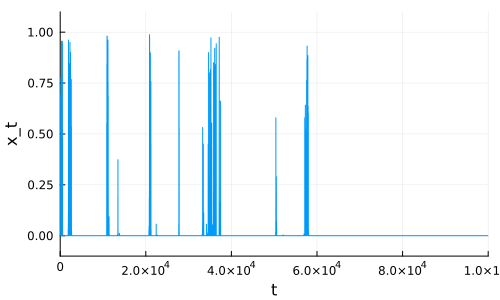

In [6]:
plot(Float32.(orb[1:T]),label="",xlabel = "t",ylabel="x_t",xlim=(0,100000),ylim=(-0.1,1.1),size=(500,300))

# Shear-induced chaos in Stuart-Landau oscillators

Stochastic Stuart-Landau oscillator, which is a normal form of Hopf bifurcation with additive noise, is given as
$$dx=\left[\alpha x-\beta y-(ax-by)(x^2+y^2)\right]dt+\sigma dW_t^x,$$
$$dy=\left[\alpha y+\beta x-(ay+bx)(x^2+y^2)\right]dt+\sigma dW_t^y,$$
where , $\alpha=1, \beta=1, a=1, \sigma=1$, and $W^x_t, W^y_t$ are Winer processes.

In the noiseless cases, the dynamics converges to the same limit cycle (a unit circle) for both $b=0.8$ and $b=8$. 

In the presence of noise with $\sigma=1$, in the weak shear case with $b=0.8$, the dynamics converges to a random point attractor around the deterministic limit cycle. In the strong shear case with $b=8$, we observe shear-induced chaos with a stationary distribution 
$$\rho(x,y)\sim \exp\left(\frac{2\alpha(x^2+y^2)-a(x^2+y^2)^2}{2\sigma^2}\right)$$

References:

[1] Lin, Kevin K., and Lai-Sang Young. "Shear-induced chaos." Nonlinearity 21.5 (2008): 899.

[2] Wieczorek, Sebastian. "Stochastic bifurcation in noise-driven lasers and Hopf oscillators." Physical Review E—Statistical, Nonlinear, and Soft Matter Physics 79.3 (2009): 036209.

[3] DeVille, RE Lee, N. Sri Namachchivaya, and Zoi Rapti. "Stability of a stochastic two-dimensional non-Hamiltonian system." SIAM Journal on Applied Mathematics 71.4 (2011): 1458-1475.

[4] Doan, Thai Son, Maximilian Engel, Jeroen S W Lamb, and Martin Rasmussen. "Hopf bifurcation with additive noise." Nonlinearity 31.10 (2018): 4567.


# Shear-induced chaos in Stuart-Landau oscillators

CUDA version　(for NVIDIA)

In [15]:
Pkg.add("CUDA")
using CUDA

   Resolving package versions...
  No Changes to `~/Documents/ergodic-code/Testing/Project.toml`
  No Changes to `~/Documents/ergodic-code/Testing/Manifest.toml`


In [16]:
Fx(x, y, α, β, a, b) = (α .* x - β .* y) - (a .* x - b .* y) .* (x.^2 + y.^2)  
Fy(x, y, α, β, a, b) = (α .* y + β .* x) - (a .* y + b .* x) .* (x.^2 + y.^2)

Fy (generic function with 1 method)

In [17]:
N = 10000          # number of particles (initial conditions)
T = 20000          # number of iterations
dt = 0.0004        # infinitesimal time interval
x = CUDA.rand(N)
dx = CUDA.zeros(N)
y = CUDA.randn(N)
dy = CUDA.zeros(N)
dWx = randn(T)     # common noise realizations
dWy = randn(T);

α=1.0 
β=1.0 
a=1.0

σ=1.0     # noise level

ErrorException: CUDA driver not found

In [ ]:
function flow(x, y, dx, dy, dWx, dWy, b, N, T; α=1.0, β=1.0, a=1.0, σ=1.0, dt=0.0002)
    flwx_cpu = zeros(T, N)                    # memory on cpu sequred
    flwy_cpu = zeros(T, N)

    flwx_gpu = CUDA.zeros(T, N)               # memory on gpu sequred
    flwy_gpu = CUDA.zeros(T, N)
    
    I = CUDA.ones(N)

    for j in 1:T
        flwx_gpu[j, :] .= x
        flwy_gpu[j, :] .= y

        dx = Fx(x, y, α, β, a, b) * dt
        dy = Fy(x, y, α, β, a, b) * dt
        x += dx + σ * dWx[j] * sqrt(dt) * I   # Euler-Maruyama scheme with dt=0.0002
        y += dy + σ * dWy[j] * sqrt(dt) * I
    end
    copyto!(flwx_cpu, flwx_gpu)               # memory on gpu is copied to memory on cpu
    copyto!(flwy_cpu, flwy_gpu)

    return flwx_cpu, flwy_cpu
end

In [ ]:
b=0.8
x=CUDA.randn(N)
y=CUDA.randn(N)
flw = flow(x, y, dx, dy, dWx, dWy, b, N, T);

In [ ]:
anim = @animate for i in 1:100
    x=flw[1][0+200*i,:]    # first 20000 iterations
    y=flw[2][0+200*i,:]
    scatter(x,y,ms=0.5,label="",xlabel="x",ylabel="y",xlim=(-3,3),ylim=(-3,3),size=(300,300))   
end                                                  
gif(anim,fps=10,"sslb.8.gif") 

In [ ]:
b=8
x=CUDA.randn(N)
y=CUDA.randn(N)
flw2 = flow(x, y, dx, dy, dWx, dWy, b, N, T);

In [ ]:
anim = @animate for i in 1:100
    x=flw2[1][0+200*i,:]    # first 20000 iterations
    y=flw2[2][0+200*i,:]
    scatter(x,y,ms=0.5,label="",xlabel="x",ylabel="y",xlim=(-3,3),ylim=(-3,3),size=(300,300))   
end                                                  
gif(anim,fps=10,"sslb8.gif") 

# Shear-induced chaos in Stuart-Landau oscillators

Metal version (for Apple M4)

In [7]:
Pkg.add("Metal")
using Metal

   Resolving package versions...
  No Changes to `~/Documents/ergodic-code/Testing/Project.toml`
  No Changes to `~/Documents/ergodic-code/Testing/Manifest.toml`


In [8]:
Fx(x, y, α, β, a, b) = (α .* x - β .* y) - (a .* x - b .* y) .* (x.^2 + y.^2)  
Fy(x, y, α, β, a, b) = (α .* y + β .* x) - (a .* y + b .* x) .* (x.^2 + y.^2)

Fy (generic function with 1 method)

In [9]:
N = 10000          # number of particles (initial conditions)
T = 20000          # number of iterations
dt = 4f-4 #0.0004        # infinitesimal time interval
x = Metal.randn(Float32,N)
dx = Metal.zeros(Float32,N)
y = Metal.randn(Float32,N)
dy = Metal.zeros(Float32,N)
dWx = randn(Float32,T)     # common noise realizations
dWy = randn(Float32,T);

In [10]:
α=1f0
β=1f0 
a=1f0
σ=1f0;    # noise level

In [11]:
function flow(x, y, dx, dy, dWx, dWy, b, N, T; α=1f0, β=1f0, a=1f0, σ=1f0, dt=2f-4)
    flwx_cpu = zeros(Float32,T, N)                    # memory on cpu sequred
    flwy_cpu = zeros(Float32,T, N)

    flwx_gpu = Metal.zeros(Float32,T, N)               # memory on gpu sequred
    flwy_gpu = Metal.zeros(Float32,T, N)
    
    I = Metal.ones(Float32,N)

    for j in 1:T
        flwx_gpu[j, :] .= x
        flwy_gpu[j, :] .= y

        dx = Fx(x, y, α, β, a, b) * dt
        dy = Fy(x, y, α, β, a, b) * dt
        x += dx + σ * dWx[j] * sqrt(dt) * I   # Euler-Maruyama scheme with dt=0.0002
        y += dy + σ * dWy[j] * sqrt(dt) * I
    end
    copyto!(flwx_cpu, flwx_gpu)               # memory on gpu is copied to memory on cpu
    copyto!(flwy_cpu, flwy_gpu)

    return flwx_cpu, flwy_cpu
end

flow (generic function with 1 method)

In [ ]:
b=8f-1
x=Metal.randn(Float32,N)
y=Metal.randn(Float32,N)
flw = flow(x, y, dx, dy, dWx, dWy, b, N, T);

┌ Info: Saved animation to /Users/samuelekstrom/Documents/ergodic-code/Testing/sslb.8.gif
└ @ Plots /Users/samuelekstrom/.julia/packages/Plots/xKhUG/src/animation.jl:156


Plots.AnimatedGif("/Users/samuelekstrom/Documents/ergodic-code/Testing/sslb.8.gif")
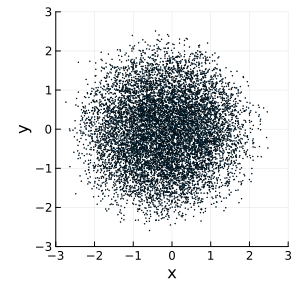

In [24]:
anim = @animate for i in 1:100
    x=flw[1][0+200*i,:]    # first 20000 iterations
    y=flw[2][0+200*i,:]
    scatter(x,y,ms=0.5,label="",xlabel="x",ylabel="y",xlim=(-3,3),ylim=(-3,3),size=(300,300))   
end                                                  
gif(anim,fps=10,"sslb.8.gif") 

In [25]:
b=8f0
x=Metal.randn(Float32,N)
y=Metal.randn(Float32,N)
flw2 = flow(x, y, dx, dy, dWx, dWy, b, N, T);

┌ Info: Saved animation to /Users/samuelekstrom/Documents/ergodic-code/Testing/sslb8.gif
└ @ Plots /Users/samuelekstrom/.julia/packages/Plots/xKhUG/src/animation.jl:156


Plots.AnimatedGif("/Users/samuelekstrom/Documents/ergodic-code/Testing/sslb8.gif")
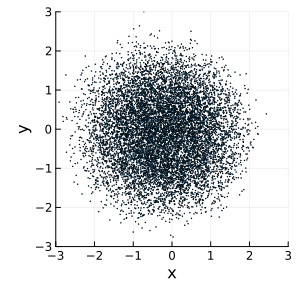

In [26]:
anim = @animate for i in 1:100
    x=flw2[1][0+200*i,:]    # first 20000 iterations
    y=flw2[2][0+200*i,:]
    scatter(x,y,ms=0.5,label="",xlabel="x",ylabel="y",xlim=(-3,3),ylim=(-3,3),size=(300,300))   
end                                                  
gif(anim,fps=10,"sslb8.gif") 

# Collective behaviour in globally coupled maps

Globally coupled logistic maps with additive noise is given as
$$x^{(i)}_{t+1}=(1-\epsilon)f(x^{(i)}_t)+\epsilon h_t +\sigma \xi_t^{(i)}, ~~~(i=1,2,\ldots,N)$$

where $f(x)=a-x^2$, $~h_t=\frac{1}{N}\sum_{k=1}^N f(x^{(k)}_t)$, and $~\xi_t^{(i)}$ is the standard gaussian noise.

In the noiseless case with $N=10^6, a=1.86, \epsilon=0.1$, we observe low-dimensional chaotic behaviour in the collective motion, given by the mean-field $h_t$. 

In the presence of noise with $\sigma=0.003$, we observe an almost deterministic torus motion of the mean-field $h_t$.


References:

[1] Shibata, Tatsuo, and Kunihiko Kaneko. "Collective chaos." Physical review letters 81.19 (1998): 4116.

[2] Shibata, Tatsuo, Tsuyoshi Chawanya, and Kunihiko Kaneko. "Noiseless collective motion out of noisy chaos." Physical review letters 82.22 (1999): 4424.

In [1]:
#using Pkg
#Pkg.add("ThreadsX")
using ThreadsX
Threads.nthreads() #Show the number of threads

1

In [8]:
N=1000000      # 10^6 maps coupled
T=1000         # 10^3 iterations unit time
x=rand(N)
h=zeros()
u = zeros(T)
v = zeros(T);

In [9]:
a=1.86
ϵ=0.1
σ=0.003         # noise level

for i in 1:3*T  # 3T=3x10^3 transients ignored
    ThreadsX.map!(z -> a-z^2, x, x)
    h = ThreadsX.sum(x)/N
    ThreadsX.map!(z -> (1-ϵ) * z + ϵ * h, x, x)
end
for i in 1:T    # deterministic collective motion
    ThreadsX.map!(z -> a-z^2, x, x)
    h = ThreadsX.sum(x)/N
    ThreadsX.map!(z -> (1-ϵ) * z + ϵ * h, x, x)
    u[i]=h
end
for i in 1:T    # collective motion with noise
    ThreadsX.map!(z -> a-z^2, x, x)
    h = ThreadsX.sum(x)/N
    ThreadsX.map!(z -> (1-ϵ) * z + ϵ * h, x, x)
    ThreadsX.map!(z -> z+σ * randn(), x, x)
    v[i]=h
end

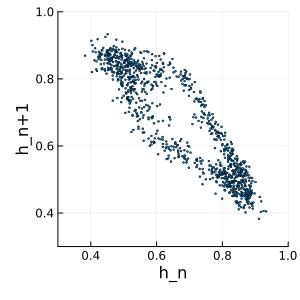

In [10]:
scatter(u[1:end-1],u[2:end],xlim=(0.3,1),ylim=(0.3,1),ms = 1,size=(300,300),label="",xlabel="h_n",ylabel="h_n+1")

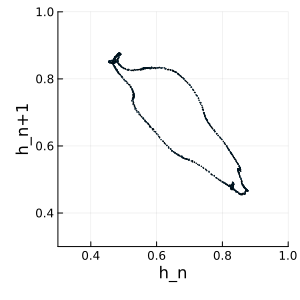

In [11]:
scatter(v[50:end-1],v[51:end],xlim=(0.3,1),ylim=(0.3,1),ms = 0.5,size=(300,300),label="",xlabel="h_n",ylabel="h_n+1")